<a href="https://colab.research.google.com/github/amitpoa/-Assignment_20231079/blob/main/Bike_Sharing_Demand_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science with Python**

Supervised Learning: Linear Regression

## Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##Load Dataset

#####Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [6]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/Bike_Demand_Dataset.csv', engine= 'python', encoding= 'ISO-8859-1')

In [7]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##Understanding the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.notnull().sum()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

In [ ]:
df.columns.values

array(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'], dtype=object)

##Dropping Data

In [ ]:
df.drop_duplicates(inplace=True)

##EDA

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

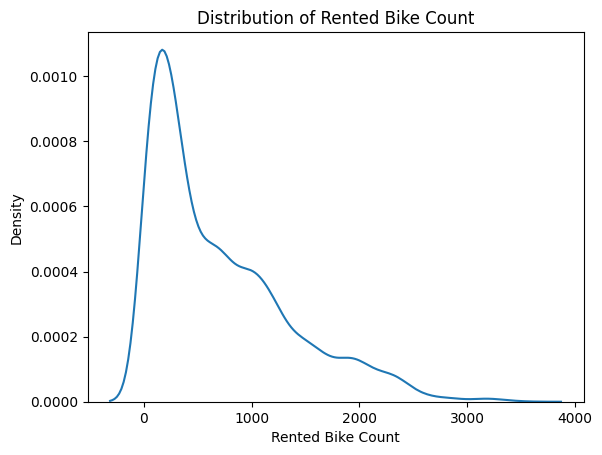

In [8]:
# Distribution of Rented Bike Count
sns.kdeplot(df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

Text(0.5, 1.0, 'Distribution of Rented Bike Count in Holiday or Working day based on Hour')

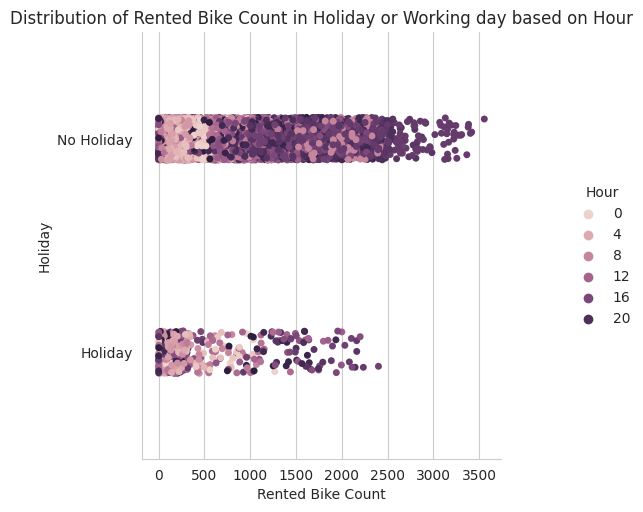

In [12]:
sns.catplot(x='Rented Bike Count', y='Holiday', hue='Hour', data=df)
plt.title('Distribution of Rented Bike Count in Holiday or Working day based on Hour')

<ipython-input-10-4316a5c3b8f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


<Axes: >

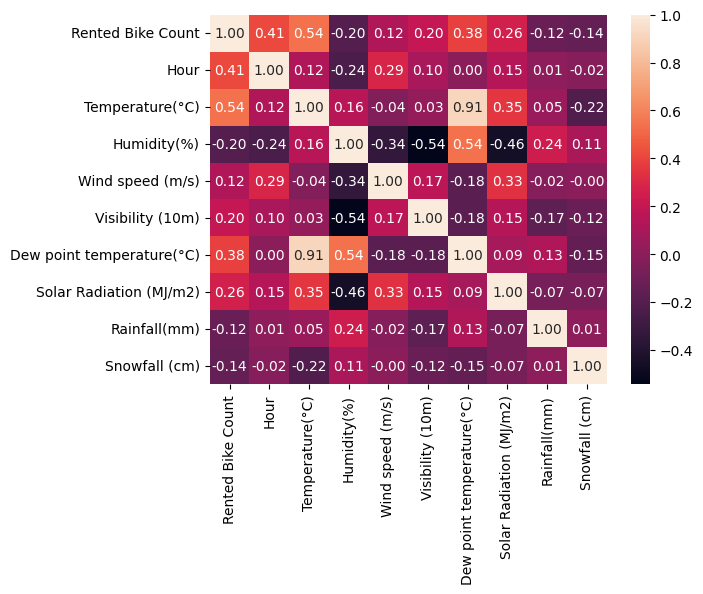

In [10]:
#Correlation of each variables
sns.heatmap(df.corr(),annot=True,fmt='.2f')




* There is a positive correlation value of 0.54 between Rented Bike Count and Temperature(°C).

*   There is a negative correlation value of -0.20 between Rented Bike Count and Humidity(%).

*   There is a positive correlation value of 0.12 between Temperature(°C) and Hour.

*   There is a strong negative correlation value of -0.54 between Humidity(%) and Visibility (10m).






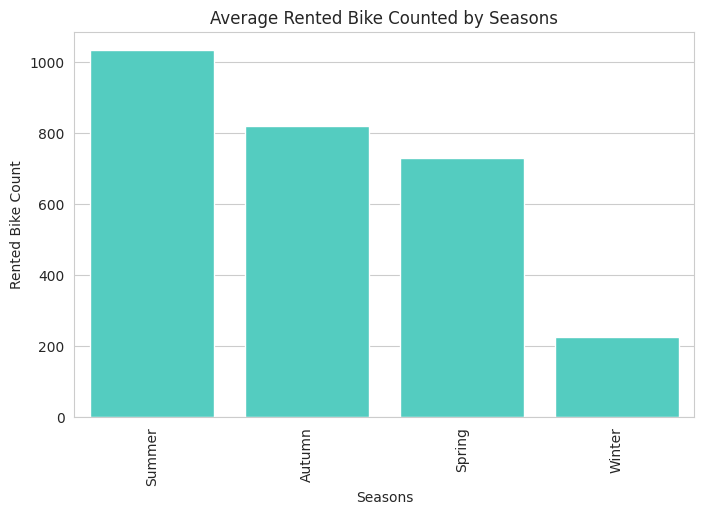

In [11]:
## Seasons vs Rented Bike Count

seasons_bike=pd.DataFrame(df.groupby('Seasons')['Rented Bike Count'].mean()).reset_index(inplace= False)
seasons_bike.sort_values("Rented Bike Count", ascending=False)
seasons_bike_sorted= seasons_bike.sort_values("Rented Bike Count", ascending=False)

fig= plt.figure(figsize=(8,5))

# make bar plot with sns
sns.set_style("whitegrid")
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = seasons_bike_sorted, color='Turquoise')
plt.title('Average Rented Bike Counted by Seasons')
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=90)
plt.show()

##Encoding Categorical Variable

In [28]:

# Converting type of columns to category
df['Hour'] = df['Hour'].astype('category')
df['Temperature(°C)'] = df['Temperature(°C)'].astype('category')
df['Humidity(%)'] = df['Humidity(%)'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Holiday'] = df['Holiday'].astype('category')

# Assigning numerical values and storing it in another columns
df['Hour_new'] = df['Hour'].cat.codes
df['Temperature(°C)_new'] = df['Temperature(°C)'].cat.codes
df['Humidity(%)	_new'] = df['Humidity(%)'].cat.codes
df['Seasons_new'] = df['Seasons'].cat.codes
df['Holiday_new'] = df['Holiday'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(df[['Hour_new', 'Temperature(°C)_new', 'Humidity(%)	_new', 'Seasons_new', 'Holiday_new']]).toarray())

# Merge with main dataset
New_df = df.join(enc_data)

New_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,656,657,658,659,660,661,662,663,664,665
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 685 entries, Date to 665
dtypes: category(5), float64(671), int16(1), int64(2), int8(4), object(2)
memory usage: 45.2+ MB


##Model Training



In [16]:
#'Humidity(%)',	'Temperature(°C)', 'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)

features = ['Temperature(°C)_new','Hour_new', 'Humidity(%)	_new', 'Seasons_new', 'Holiday_new']
target = ['Rented Bike Count']

X = New_df[features]
y = New_df[target]

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (8760, 5)
Shape of y =  (8760, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7008, 5) (1752, 5) (7008, 1) (1752, 1)


##Linear Regression Prediction

In [18]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [19]:
coefficients = model.coef_
print(coefficients)

[[  2.66857182  28.30835706  -6.87162186 -64.57979597 157.04177509]]


In [20]:
c = model.intercept_
print(c)

[-116.08602757]


In [21]:
coef_df = pd.DataFrame({"features": X.columns,
                       "coefficients": np.squeeze(coefficients)})

display(coef_df)

,features,coefficients
0,Temperature(°C)_new,2.668572
1,Hour_new,28.308357
2,Humidity(%)\t_new,-6.871622
3,Seasons_new,-64.579796
4,Holiday_new,157.041775


##Prediction

In [22]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 886.79444214]
 [1267.81994202]
 [1368.66828347]
 ...
 [ 782.38971024]
 [-130.95403857]
 [1364.7774574 ]]


In [23]:
print(y_test)

      Rented Bike Count
6056               1728
5556                822
5990                658
7674               2716
3319               1083
...                 ...
8307                122
100                  42
6605                179
1783                294
6013                673

[1752 rows x 1 columns]


##Prediction Error

In [33]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAE =  350.0799584176577
MSE =  225973.88322467878
RMSE =  475.36710364167897
r_squared =  0.45763608842950443
